In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import scale, StandardScaler
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score, roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPRegressor
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier


In [3]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ml/Diabetes.csv")

In [4]:
X = df.drop("diabetes", axis=1)
y = df["diabetes"]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
!pip install xgboost

In [7]:
from xgboost import XGBClassifier

In [8]:
xgb_model = XGBClassifier().fit(X_train, y_train)

In [11]:
xgb_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [9]:
y_pred = xgb_model.predict(X_test)

In [10]:
accuracy_score(y_test, y_pred)

0.7077922077922078

**Model Tuning**

In [12]:
xgb = XGBClassifier()

In [13]:
xgb_params = {"n_estimators": [100,500],
              "subsample": [0.6, 1],
              "max_depth": [2, 3],
              "learning_rate": [0.1,0.001]}

In [14]:
xgb_cv_model = GridSearchCV(xgb, xgb_params, cv=10, n_jobs=-1, verbose=2).fit(X_train, y_train)

Fitting 10 folds for each of 16 candidates, totalling 160 fits


In [15]:
xgb_cv_model.best_params_

{'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 100, 'subsample': 1}

**Tuned Model**

In [16]:
xgb_tuned = XGBClassifier(learning_rate=0.1, max_depth=2, n_estimators=100, subsample=1).fit(X_train, y_train)

In [17]:
y_pred = xgb_tuned.predict(X_test)

In [18]:
accuracy_score(y_test, y_pred)

0.7532467532467533

**Variable Significance Levels**

In [19]:
xgb_tuned.feature_importances_

array([0.10644169, 0.3359635 , 0.05882388, 0.07567836, 0.06489261,
       0.14660726, 0.06331185, 0.14828077], dtype=float32)

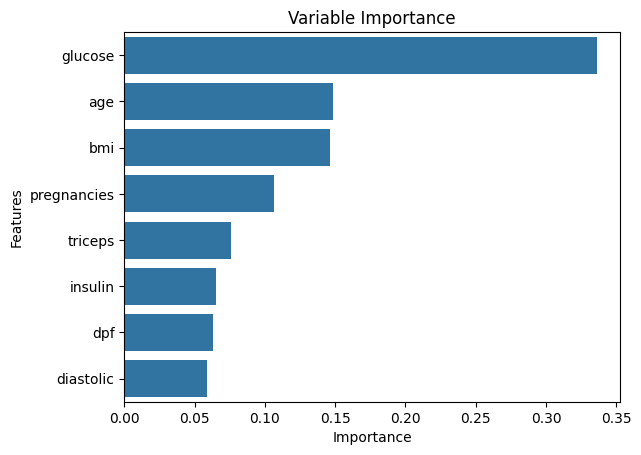

In [20]:
# Önem düzeylerini DataFrame'e çevir ve sıralama yap
feature_importances = pd.DataFrame({"Importance": xgb_tuned.feature_importances_},
                                    index=X_train.columns)

# Önem düzeylerini büyükten küçüğe sırala
feature_importances = feature_importances.sort_values(by="Importance", ascending=False)

# Barplot çizimi: x ekseni önem düzeyleri, y ekseni değişken isimleri
sns.barplot(x=feature_importances["Importance"], y=feature_importances.index)

plt.xlabel("Importance")
plt.ylabel("Features")
plt.title("Variable Importance")
plt.show()
